In [5]:
from lumicks import pylake
import numpy as np
import sys
import math
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from scipy.signal import savgol_filter
#from skimage import io
import os
import matplotlib.animation as animation
import matplotlib as mpl

%matplotlib inline

In [6]:
def strip_ext(file_name):
    file_name_split = file_name.split(".h5")
    file_name_no_ext = file_name_split[0]
    return(file_name_no_ext)

In [7]:
#Load data
data_folder = "../data/" #Set as folder containing data to process
output_folder = ("../output/") #Folder used for outputs
exp_id_split = data_folder.split("/")
exp_id = exp_id_split[-2]

#Create output folder
if not os.path.exists(output_folder + exp_id):
    os.makedirs(output_folder + exp_id)

#Get All Files from data folder
filenames = sorted(os.listdir(data_folder)) #Sorted based on file names

#Define empty lists to store files of interest
kymo_list = []
kymo_list_names = []
fd_list = []
fd_list_names = []
tiff_list = []
tiff_list_names = []
marker_list = []
marker_list_names = []
scan_list = []
scan_list_names = []
calibration_list = []

#Load all Kymographs, FD curves, .tiff, marker and scan files to lists
x = 0

load_verbose = "TRUE"

for file in filenames:
    if file.endswith(".h5") and "Kymograph" in file: #Loads Kymograph .h5 files
        x += 1
        kymo_list.append(pylake.File(data_folder + file))
        kymo_list_names.append(file)
        if load_verbose == "TRUE":
            print("Loaded " + str(x) + "/" + str(len(filenames)) + ": " + file)
    if file.endswith(".h5") and "FD Curve" in file:
        x += 1
        fd_list.append(pylake.File(data_folder + file)) #Loads FD .h5 files
        fd_list_names.append(file)
        if load_verbose == "TRUE":
            print("Loaded " + str(x) + "/" + str(len(filenames)) + ": " + file)
    if file.endswith(".tiff"): #Load .tiff files
        x += 1
        tiff_list.append(io.imread(data_folder + file))
        #tiff_list_names.append(file)
        if load_verbose == "TRUE":
            print("Loaded " + str(x) + "/" + str(len(filenames)) + ": " + file)
    if file.endswith(".h5") and "Marker" in file:
        x += 1
        marker_list.append(pylake.File(data_folder + file)) #Loads FD .h5 files
        marker_list_names.append(file)
        if load_verbose == "TRUE":
            print("Loaded " + str(x) + "/" + str(len(filenames)) + ": " + file)
    if file.endswith(".h5") and "Scan" in file:
        x += 1
        scan_list.append(pylake.File(data_folder + file)) #Loads FD .h5 files
        scan_list_names.append(file)
        if load_verbose == "TRUE":
            print("Loaded " + str(x) + "/" + str(len(filenames)) + ": " + file)

Loaded 1/4: 20220805-185708 Scan 35MT7(12 uM Tub).h5
Loaded 2/4: 20220909-161538 Scan 20 mt 10NM HSET_2.h5
Loaded 3/4: 20230602-221543 Scan taxol_eb_hset_1.h5
Loaded 4/4: 20230602-223838 Scan taxol_eb_hset_2.h5


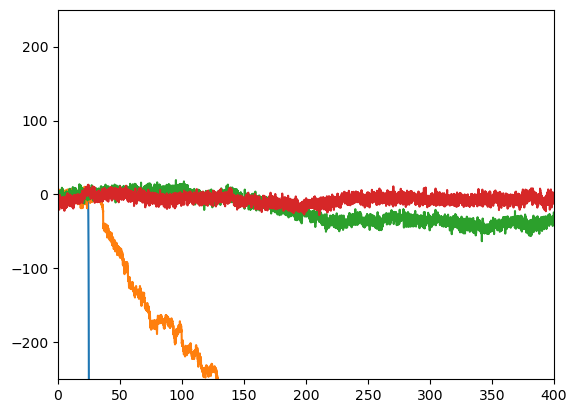

In [11]:
for index, file in enumerate(scan_list):
    force2x = file.downsampled_force2x.data
    force2y = file.downsampled_force2y.data
    distance = (file.distance1.data) - file.distance1.data[0]  #Convert from um to nm/bp
    time = (file.distance1.timestamps - min(file.distance1.timestamps))/1e9
   
    plt.plot(time, 1000*distance) 
    plt.xlim(0,400)
    plt.ylim(-250,250)
    

In [12]:
file_number = 0
file = scan_list[file_number]
print (file.downsampled_force2x.calibration)
print (file.downsampled_force2y.calibration)

[{'Axial calibration': 0.0, 'Bead diameter (um)': 2.0, 'D (V^2/s)': 0.024415264555058325, 'Fit range (max.) (Hz)': 23000.0, 'Fit range (min.) (Hz)': 100.0, 'Fit tolerance': 1e-07, 'Hydrodynamic correction enabled': 0.0, 'Kind': 'Reset offset to zero', 'Max iterations': 10000.0, 'Number of samples': 781250.0, 'Offset (pN)': -14.592834230617767, 'Points per block': 2000.0, 'Rd (um/V)': 3.170171563809053, 'Response (pN/V)': 1171.3555370244014, 'Rf (pN/V)': 1171.3555370244014, 'Sample rate (Hz)': 78125.0, 'Sign': -1.0, 'Start time (ns)': 1659711893346110000, 'Stop time (ns)': 1659711903346110000, 'Temperature (C)': 25.0, 'Viscosity (Pa*s)': 0.00089, 'alpha': 0.411627167263163, 'backing (%)': 99.89993715800897, 'chi_squared_per_deg': 1.4505577292178906, 'err_D (V^2/s)': 0.0004603479876831984, 'err_alpha': 0.006650528012571295, 'err_f_diode (Hz)': 322.45185708443097, 'err_fc (Hz)': 43.156937153315624, 'f_diode (Hz)': 10977.992037391918, 'fc (Hz)': 3505.3789200703277, 'gamma_0 (kg/s)': 1.6776

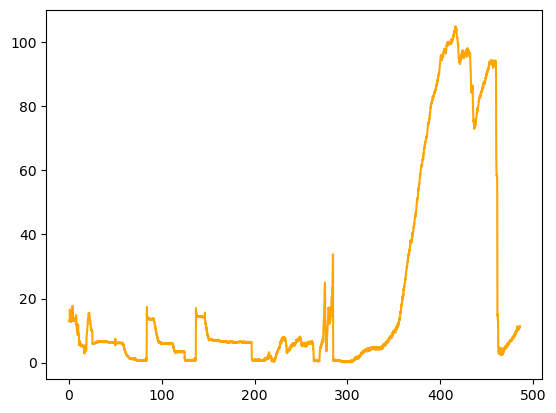

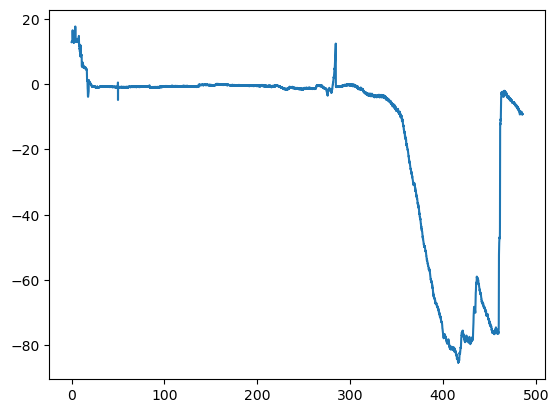

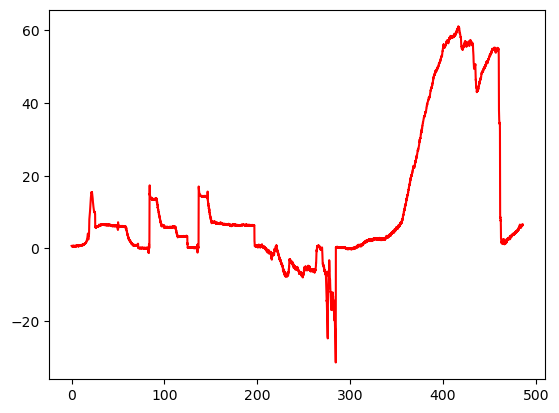

(0.0, 50.0)

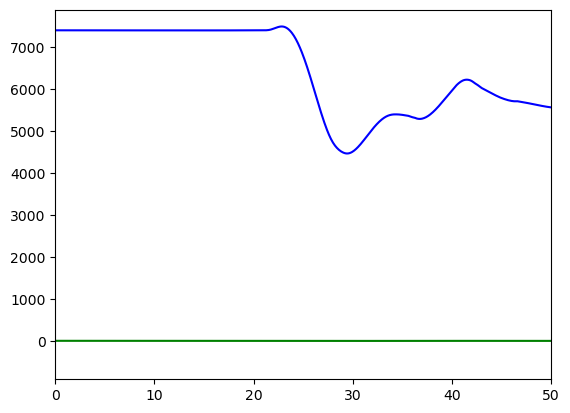

In [13]:
file_number = 0
file = scan_list[file_number]
force2x = file.downsampled_force2x.data
force2y = file.downsampled_force2y.data
force = file.downsampled_force2.data
distance = (file.distance1.data) #Convert from um to nm/bp
time = (file.distance1.timestamps - min(file.distance1.timestamps))/1e9

distance_smooth = 1000*savgol_filter(np.ravel(distance), 100, 3)
force_smooth = savgol_filter(np.ravel(force), 10, 3)

plt.plot(time, force, color = "orange") #plot Force 2X
plt.show()

plt.plot(time, force2x) #plot Force 2X
plt.show()
    
plt.plot(time, force2y, color = "red") #plot Force 2Y
plt.show()

plt.plot(time, distance, color = "green")
plt.plot(time, distance_smooth, color = "blue")
plt.xlim(0,50)


In [5]:
import pandas as pd
from scipy.signal import find_peaks
#from scipy.signal import find_peaks_cwt



In [10]:
peaks = []
peaks_time = []
peaks_force = []
indices = find_peaks(-distance_smooth, prominence = 2)

plt.plot(time, distance_smooth, color = "blue")
plt.xlim(0,200)

i = 0
for x in indices[0]:
    peaks.append(distance_smooth[x])
    peaks_time.append(time[x])
    peaks_force.append(force_smooth[x])
plt.scatter(peaks_time,peaks, color = "red")
plt.show()
plt.plot(time,force)
plt.plot(time,force_smooth)
plt.scatter(peaks_time,peaks_force, color = "red", s =100)
plt.xlim(0,200)
plt.show()
#plt.hist(peaks_force)
print(peaks_force)


NameError: name 'find_peaks' is not defined

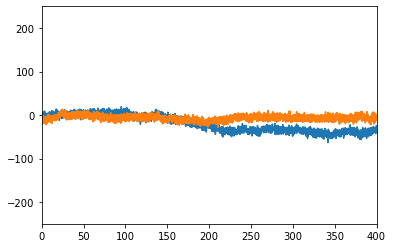

In [7]:
for index, file in enumerate(scan_list):
    force2x = file.downsampled_force2x.data
    force2y = file.downsampled_force2y.data
    distance = (file.distance1.data) - file.distance1.data[0]  #Convert from um to nm/bp
    time = (file.distance1.timestamps - min(file.distance1.timestamps))/1e9
   
    plt.plot(time, 1000*distance) 
    plt.xlim(0,400)
    plt.ylim(-250,250)
    
    

In [8]:
#Process 2D Scans

#Stand alone scans
for index, x in enumerate(scan_list):
    for scan in x.scans:
        sc = x.scans[scan]
        sc.save_tiff(output_folder + exp_id + "/" + strip_ext(scan_list_names[index]) + "_" + scan + ".tiff")
    file_name = strip_ext(scan_list_names[index])
    file_name_split_date = file_name.split("-")
    file_name_short_date = file_name_split_date[-1]
    file_name_split_marker = file_name_short_date.split(" Marker")
    file_name_short = file_name_split_marker[0]
    print(file_name_short_date)
    x = scan_list[index]

    force = x.downsampled_force2.data
    distance = (x.distance1.data) #Convert from um to nm/bp
    time = (x.distance1.timestamps - min(x.distance1.timestamps))/1e9

    export = np.column_stack((time, distance, force))
    column_names = ((file_name_short + "_t") + "," + (file_name_short + "_d") + "," + (file_name_short + "_f"))

    np.savetxt(output_folder + exp_id + "/" + file_name_short_date + ".txt", export, delimiter=",",header=column_names)
        
    
    
    
    
    

        
        
        
        
#Process force time traces
    
    


221543 Scan taxol_eb_hset_1
223838 Scan taxol_eb_hset_2
